# Fitting the Full Gamma Spectrum


$$ e+g=e'+g' $$
$$ e'=(em+ge-ge',0,-ge'.sin(t),ge-ge'.cos(t)) $$
em^2+2.(ge-ge')+ (ge-ge')^2 - ge'^2.sin^2(t) - (ge-ge')^2.cos^2(t)
em^2+2.(ge-ge')+ (ge-2.ge').ge.sin^2(t)
$$ em' = sqrt[ (em+ge-ge')^2 - ge'^2.sin^2(t) - (ge-ge'.cos(t))^2 ] $$
$$ em' = sqrt[ (em+ge-ge')^2 - ge^2 + 2.ge.ge'.cos(t) ] $$
$$ em' = sqrt[ em^2 + ge'^2 + 2.em.ge + - 2.em.ge'+ 2.ge.ge'.(cos(t) - 1) ] $$

ge-ge' = ge^2/em.(1-cos(t)) / (1 + ge/em.(1-cos(t)))
em+ge-ge' = ( em + (em - ge).ge/em.(1-cos(t)) ) / ( 1 + ge/em.(1-cos(t)) )

$$ p_s(E) = A_s \cdot \delta(E-E_\gamma) $$
$$ p_c(E) = A_c \cdot \left(\frac{1}{\sigma} \frac{\partial\sigma}{\partial\Omega}\right)_E $$
$$ p_e(E) = A_e \cdot \left(\frac{1}{\sigma} \frac{\partial\sigma}{\partial\Omega}\right)_{E_\gamma-E}~? $$


$$ p_r(E) \sim \mathcal{N}(E|\mu=0,\sigma=\sigma_r) = e^{-E^2/\left(2\sigma_r^2\right)} / \left(\sigma_r \sqrt{2\pi}\right) $$

$$ p_{\text{spectrum}} = p_s(E) + p_c(E) + p_e(E) $$
$$ p_{\text{spectrum+response}}(E) = p_{s+r}(E) + p_{c+r}(E) + p_{e+r}(E) 
    = p_{\text{spectrum}}(E)*p_{\text{response}}(E)$$


$$ \frac{\partial\sigma}{\partial\Omega} = \frac{r_e^2}{2} \left(\frac{E}{E_\gamma}\right)^2 \left(\frac{E}{E_\gamma} + \frac{E_\gamma}{E} - \sin^2\theta\right) $$
$$ E = E_\gamma / \left(1 + \frac{E_\gamma}{m_e}(1-\cos\theta)\right) $$
$$ \theta = \cos^{-1}\left(1 - m_e \cdot \left(\frac{1}{E} - \frac{1}{E_\gamma}\right)\right) $$

$$ \sin^2\left(\cos^{-1}x\right) = 1 - x^2 $$
$$ \frac{\partial\sigma}{\partial\Omega} = \frac{r_e^2}{2} \left(\frac{E}{E_\gamma}\right)^2 \left(\frac{E}{E_\gamma} + \frac{E_\gamma}{E} - \left(1 - \left(1 - m_e \cdot \left(\frac{1}{E} - \frac{1}{E_\gamma}\right)\right)^2\right)\right) $$
$$ \frac{\partial\sigma}{\partial\Omega} = \frac{r_e^2}{2} \left(\frac{E}{E_\gamma}\right)^2 \left(\frac{E}{E_\gamma} + \frac{E_\gamma}{E} - \left(1 - \left(1 - 2m_e \cdot \left(\frac{1}{E} - \frac{1}{E_\gamma}\right) + m_e^2 \cdot \left(\frac{1}{E^2} - \frac{2}{EE_\gamma} + \frac{1}{E_\gamma^2}\right) \right)\right)\right) $$
$$ \frac{\partial\sigma}{\partial\Omega} = \frac{r_e^2}{2} \left(\frac{E}{E_\gamma}\right)^2 \left(\frac{E}{E_\gamma} + \frac{E_\gamma}{E} - 2m_e \cdot \left(\frac{1}{E} - \frac{1}{E_\gamma}\right) + m_e^2 \cdot \left(\frac{1}{E^2} - \frac{2}{EE_\gamma} + \frac{1}{E_\gamma^2}\right) \right) $$
$$ \frac{\partial\sigma}{\partial\Omega} = \frac{r_e^2}{2} \left(\frac{E^3}{E_\gamma^3} + \frac{E}{E_\gamma} - 2m_e \cdot \left(\frac{E}{E_\gamma^2} - \frac{E^2}{E_\gamma^3}\right) + m_e^2 \cdot \left(\frac{1}{E_\gamma^2} - \frac{2E}{E_\gamma^3} + \frac{E^2}{E_\gamma^4}\right) \right) $$
$$ \frac{\partial\sigma}{\partial\Omega} = \frac{r_e^2}{2} \left(
    \frac{m_e^2}{E_\gamma^2} +
    E \cdot \left( \frac{1}{E_\gamma} - \frac{2m_e}{E_\gamma^2} - \frac{2m_e^2}{E_\gamma^3} \right) +
    E^2 \cdot \left( \frac{2m_e}{E_\gamma^3} + \frac{m_e^2}{E_\gamma^4} \right) +
    \frac{E^3}{E_\gamma^3}
\right) $$




In [1]:
from pathlib import Path

import numpy as np
import numba as nb
import scipy as sp
from scipy.special import gamma
from scipy.optimize import curve_fit, basinhopping

import matplotlib.pyplot as plt

import functools
import ROOT

import colorama


x = np.arange(20).reshape(1, -1)
x[x > 11]

Welcome to JupyROOT 6.30/04


array([12, 13, 14, 15, 16, 17, 18, 19])

In [2]:
# https://stackoverflow.com/questions/52331944/cache-decorator-for-numpy-arrays
from typing import Callable
import numpy as np
from functools import cache, wraps


def np_cache(function):
    @cache
    def cached_wrapper(*args, **kwargs):

        args = [np.array(a) if isinstance(a, tuple) else a for a in args]
        kwargs = {
            k: np.array(v) if isinstance(v, tuple) else v for k, v in kwargs.items()
        }

        return function(*args, **kwargs)

    @wraps(function)
    def wrapper(*args, **kwargs):
        args = [tuple(a) if isinstance(a, np.ndarray) else a for a in args]
        kwargs = {
            k: tuple(v) if isinstance(v, np.ndarray) else v for k, v in kwargs.items()
        }
        return cached_wrapper(*args, **kwargs)

    wrapper.cache_info = cached_wrapper.cache_info
    wrapper.cache_clear = cached_wrapper.cache_clear

    return wrapper

In [3]:
# Helper Functions for the Fits

def gausn(x, m, s, normalized=True):
    # if isinstance(s, np.ndarray):
    #         s = np.repeat(s, x.shape[1], 1) # this is ugly bur it works
    # elif not isinstance(s, np.ndarray):
    #     s = s * np.ones_like(x)
    # # out = ( s==0 ).astype(float)
    # out = ( s>0 ).astype(float)
    # # print(x.shape, s.shape, (s>0).sum())
    # out[s>0] = np.exp(-((x[s>0]-m)/s[s>0])**2 / 2) / (s[s>0] * (2*np.pi)**0.5) 
    # out = np.exp(-((x-m)/s)**2 / 2) / (s * (2*np.pi)**0.5) 
    top = np.divide(x-m, s, where=s>0)
    out = np.divide(np.exp(-(top)**2 / 2), s * (2*np.pi)**0.5, where=s>0) 
    if normalized: #! using the sum/integral breaks convolutions
        out *= abs(x[1]-x[0]) # /= out.sum() # /= np.trapz(out, x)
    # out[~np.isfinite(out)] = 0
    return out

def poisn(x, l, normalized=True):
    out = ( (0 <= x) & (x < 5*l) ).astype(float)
    out[out>0] = np.power(l, x[out>0]) * np.exp(-l) / gamma(x[out>0] + 1)
    if normalized: #! using the sum/integral breaks convolutions
        out *= abs(x[1]-x[0]) # /= out.sum() # /= np.trapz(out, x) 
    return out


def find_main_peak(hist, move_param):
    for i in range(3):
        if i == 0:
            # bin = 0;       underflow bin
            # bin = 1;       first bin with low-edge xlow INCLUDED
            # bin = nbins;   last bin with upper-edge xup EXCLUDED
            # bin = nbins+1; overflow bin
            centers = np.array([hist.GetBinCenter(ibin) for ibin in range(1, hist.GetNbinsX())])
            content = np.array([hist.GetBinContent(ibin) for ibin in range(1, hist.GetNbinsX())])
            A, mu = 0, 0
            for ic, (ce, co) in enumerate(zip(centers[::-1], content[::-1])):
                if ic < 10:
                    continue
                left = np.mean(content[::-1][ic:ic+move_param])
                right = np.mean(content[::-1][ic-move_param:ic])
                center = np.mean(content[::-1][ic-5:ic+5])

                if center > left and center > right and center > np.mean(content) and abs(left-right)*2/(left+right) < 0.1:# and center > A:
                    mu, A = ce, co
                    # print(hist.GetName(), mu, A)
                    return mu, A

        return 0,0


def find_main_peak_statistical(hist, move_param=7):
    def pass_stats(a, b=0, nsigma=1, do_abs=False): 
        if do_abs:
            return abs(a - b) > nsigma * ( a + b )**0.5
        return (a - b) > nsigma * ( a + b )**0.5
    
    # bin = 0;       underflow bin
    # bin = 1;       first bin with low-edge xlow INCLUDED
    # bin = nbins;   last bin with upper-edge xup EXCLUDED
    # bin = nbins+1; overflow bin
    if isinstance(hist, tuple) and isinstance(hist[0], (list, np.ndarray)):
        centers, content = hist[0], hist[1]
    else:
        centers = np.array([hist.GetBinCenter(ibin) for ibin in range(1, hist.GetNbinsX())])
        content = np.array([hist.GetBinContent(ibin) for ibin in range(1, hist.GetNbinsX())])
    
    centers, content = centers[::-1], content[::-1] # look at the histogram RTL
    content_max = np.max(content)
    mean_rtl = np.cumsum(content) / np.arange(1, len(content)+1)

    for ic in range(move_param+move_param//2+1, len(centers)-move_param-move_param//2-1): 
        # if ic < 10:
        #     continue

        # find averages in small windows around the center 
        # left/right is the original left/right hence the indices
        cl , cr = int(ic + (move_param+1)/2), int(ic - move_param/2)
        center = np.mean( content[ cr : cl ] ) # [ic-5:ic+5])
        left = np.mean( content[ cl : cl + move_param ] ) # [ic:ic+move_param])
        right = np.mean( content[ cr - move_param : cr ] ) # [ic-move_param:ic])
        mean = mean_rtl[ic]

        # sides_are_balanced = (abs(left-right)*2/(left+right) < 0.1) # diff is less tha 10% of their average
        # center_is_peak = center > left and  center > right
        # center_above_average = center > np.mean(content)
        sides_are_balanced = not pass_stats(left, right, do_abs=True) # diff is less than 1 sigma of 0
        center_is_peak = pass_stats(center, left) and pass_stats(center, right)
        center_above_average = pass_stats(center, mean) # diff is greater than 1 sigma

        # x_center = np.mean( centers[ ic - move_param : ic + move_param ] )
        x_center = ((centers*content)[cr:cl]).sum() / content[cr:cl].sum()
        x_left = ((centers*content)[cl:cl+move_param]).sum() / content[cl:cl+move_param].sum()
        x_right = ((centers*content)[cr-move_param:cr]).sum() / content[cr-move_param:cr].sum()

        # marker = '#' if center_above_average else '-'
        # color = colorama.Fore.RED + colorama.Style.BRIGHT if center_is_peak else ''
        # color += colorama.Back.GREEN if sides_are_balanced else ''

        # print(color + f"{centers[ic]:>4.0f} -> {x_center:>4.0f} | ({left:>4.0f}, {center:>4.0f}, {right:>4.0f}), {mean:>3.0f} -> {sides_are_balanced*1}, {center_is_peak*1}, {center_above_average*1}  | " + marker*int(80*center/content_max))
        # print(colorama.Style.RESET_ALL)

        if  center_is_peak and sides_are_balanced and center_above_average:
            # mu, A = x_center, center
            bkg = np.median(mean_rtl[:ic])
            # print(x_left, x_center, x_right, left, center, right, bkg)
            sigma_left = (x_center-x_left)/( -2*np.log((left-bkg)/(center-bkg)) )**0.5
            sigma_right = (x_right-x_center)/( -2*np.log((right-bkg)/(center-bkg)) )**0.5

            return x_center, center, (sigma_left+sigma_right)/2

    return 0,0,0#mu, A
    print("Failed to intelligently find the peak")
    return 800, -1

        


# Compton Fit & Helpers
electron_mass = 511 # keV

def compton_energy(energy_in, theta):
    return energy_in / ( 1 + energy_in / electron_mass * (1 - np.cos(theta)))

def compton_theta(energy_in, energy_out):
    return np.arccos(1 - electron_mass * (1/energy_out - 1/energy_in))

def klein_nishina_v1(energy_in, energy_out):
    re = 1

    energy_in = np.asarray(energy_in)
    energy_out = np.asarray(energy_out)
    minE, maxE = energy_in/(1+2*energy_in/electron_mass), energy_in
    maskE = (minE <= energy_out) & (energy_out <= maxE)

    eOeI = energy_out/energy_in
    theta = compton_theta(energy_in, energy_out)
    out = 1/2 * re**2 * (eOeI)**2 * (eOeI + 1/eOeI - np.sin(theta)**2) #* np.sin(theta)
    out[~maskE] = 0

    return out


ps 1 1.0
pg 1.000755385706301 1.000755385706301
pe 1.0007553857063007 0.9990516296113914
ps_smear 1.0 1.0000000000000002
pg_smear 1.0022787134991988 1.0022787134991988
pe_smear 1.0014623624751546 1.0014623624751546
ps 1 1.0
pg 1.0013166822210464 1.0013166822210464
pe 1.0013166822210464 1.0008971130125484
ps_smear 0.9999811816762524 0.9999804592461358
pg_smear 1.0015845053953403 1.0015844976590713
pe_smear 1.001204158945886 1.0012041589458862


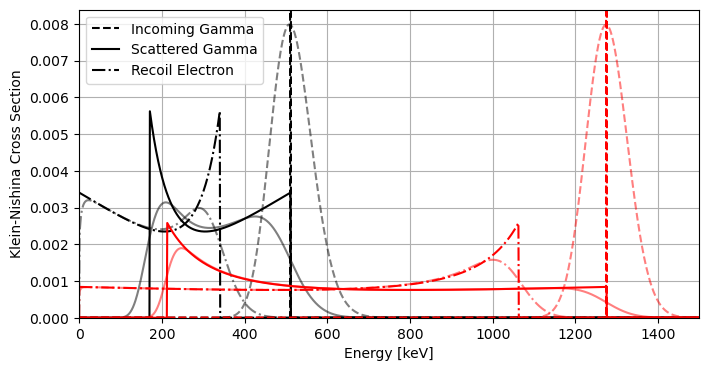

In [4]:
re, me = 1, 511 # electron radius, mass
eg = 511
# de = 0.1
de = 1
e = np.arange(0, 1500, de)
# e = np.arange(0, 900, de)
# t = np.arccos(1 - me*(1/e - 1/eg))

s = 50
# x = np.arange(-5*s, 5*s, de)
# r = np.exp(-(x/s)**2/2)/(s*(2*np.pi)**0.5)

@cache
def kn_xs(eg):
    a = np.pi * re**2 * me / eg**2 #! math says this is supposed to be negative?
    elow, ehigh = eg/(1+2*eg/me), eg
    elow = a*((2*me/eg + (me/eg)**2)*elow + (elow**2/2)/eg + (eg-2*me*(1+me/eg))*np.log(elow) - me**2/elow)
    ehigh = a*((2*me/eg + (me/eg)**2)*ehigh + (ehigh**2/2)/eg + (eg-2*me*(1+me/eg))*np.log(ehigh) - me**2/ehigh)
    return ehigh - elow

def kn(e, eg=511, normalized=True):
    a = ( np.pi * re**2 / kn_xs(eg) ) * ( me / eg**2 ) # * (-1)**(e[1]<e[0])
    out = ( (eg/(1+2*eg/me) <= e) & (e <= eg) ).astype(float)
    out[out>0] = a*(2*me/eg + (me/eg)**2 + e[out>0]/eg + (eg-2*me*(1+me/eg))/e[out>0] + (me/e[out>0])**2)
    if normalized: #! using the sum/integral breaks convolutions
        out *=  abs(e[1]-e[0]) # /= out.sum() # /= np.trapz(out, e) 
    return out

def kn_smear(e, eg, s):
    de = abs(e[1]-e[0])
    z = np.arange(eg/(1+2*eg/me)-de, eg+de, de)
    # z = np.arange(eg/(1+2*eg/me), eg, de)

    e = e.reshape(-1,1)
    if isinstance(s, np.ndarray):
        s = s.reshape(-1,1)
    pg_smear = np.trapz(gausn(e - z, 0, s, normalized=False)*kn(z, eg), z, axis=1)
    return pg_smear

kn = np_cache(kn)
kn_smear = np_cache(kn_smear)

###########

plt.figure(figsize=(8,4))
ymax = 0
# for _eg, c in zip([137, 511, 662, 1275], ["k","r","g","b"]):
for _eg, c in zip([511, 1275], ["k","r"]):
    # if _eg != 511:
    #     continue
    ps = np.zeros_like(e)
    ps[np.argmin(np.abs(e-_eg))] = 1
    pg = kn(e, _eg)
    pe = kn(_eg - e, _eg)
    # ps = np.convolve(ps, gausn(np.arange(-6*s, 6*s, de), 0, s), "same")
    # pg = np.convolve(pg, gausn(np.arange(-6*s, 6*s, de), 0, s), "same")
    # pe = np.convolve(pe, gausn(np.arange(-6*s, 6*s, de), 0, s), "same")
    print("ps", ps.sum(), np.trapz(ps, e))
    print("pg", pg.sum(), np.trapz(pg, e))
    print("pe", pe.sum(), np.trapz(pe, e))


    plt.plot(e,ps, c+"--", label=("Incoming Gamma" if ymax==0 else ""))
    plt.plot(e,pg, c+"-", label=("Scattered Gamma" if ymax==0 else ""))
    plt.plot(e,pe, c+"-.", label=("Recoil Electron" if ymax==0 else ""))

    _s = s * (e/_eg)**0.5
    # _s = s * (e/_eg)**2 
    # _s = s * (e/_eg)
    # _s = s
    ps_smear = gausn(e, _eg, _s)
    pg_smear = kn_smear(e, _eg, _s)
    pe_smear = kn_smear(_eg - e, _eg, _s)
    print("ps_smear", ps_smear.sum(), np.trapz(ps_smear, e))
    print("pg_smear", pg_smear.sum(), np.trapz(pg_smear, e))
    print("pe_smear", pe_smear.sum(), np.trapz(pe_smear, e))
    plt.plot(e,ps_smear, c+"--", alpha=0.5)
    plt.plot(e,pg_smear, c+"-", alpha=0.5)
    plt.plot(e,pe_smear, c+"-.", alpha=0.5)

    ymax = max(ymax, pg.max(), pe.max(), ps_smear.max(), pg_smear.max(), pe_smear.max())

plt.xlim(0, e.max())
plt.ylim(0, 1.05*ymax)
# plt.ylim(1e-5, 2*ymax)
# plt.yscale("log")
plt.xlabel("Energy [keV]")
plt.ylabel("Klein-Nishina Cross Section")
plt.legend()
plt.grid()

_m1=494.2973372763099, _s_m1=40.933267929866254
measured dip_pos? = 396.7163378514557
ideal peak ae1? = 329.5315581842066
measured peak ae1? = 294.203350044003
offset? = 52.992312210305364
peak after offset ae1? = 294.203350044003
peak after offset m1? = 441.30502506600453
y_data.sum()=24947.0
const bkg =  26.0
a1? = 8484.0
ae1? = 10902.30168914039 181.27080813951818
ae2? = 4875.521402727308 26.0

popt = [ 53, 41, 441, 8484, 2000, 10902, 0, 2000, 4876 ]
y_se.sum()=10499.357161065325
y_se2.sum()=4910.4875776985045


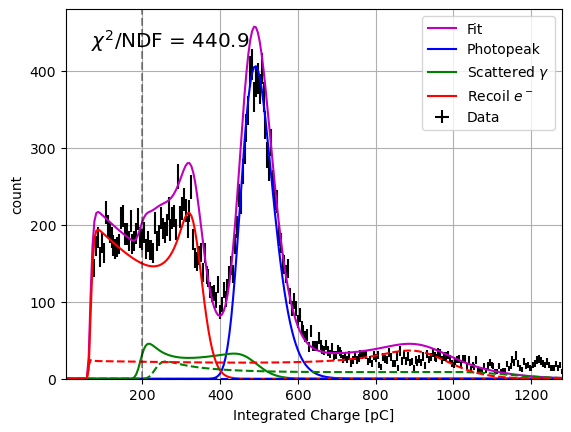

In [9]:

def bi_modal(x, a1, m1, s1, a2, m2, s2, m, c):
    return (
        a1 * np.exp(-(((x - m1) / s1) ** 2))
        + a2 * np.exp(-(((x - m2) / s2) ** 2))
        + m * x
        + c
    )

def full_spectrum(x, *args):
    o, s = None, 0
    m1, a1, ac1, ae1 = 0, 0, 0, 0
    a2, ac2, ae2 = None, None, None
    c = None
    energy0 = 511 # keV, for Na22
    energy02 = 1275 # kev, for Na22 2nd photopeak

    # pad x to x=0 (needed for conv)
    # dx = x[1] - x[0]
    # x0 = x*1.
    # if x[0] > 0:
    #     x = np.arange(x.max(), 0, -dx)[::-1]

    match len(args):
        case 5:
            s, m1, a1, ac1, ae1 = args
        case 6:
            s, m1, a1, ac1, ae1, c = args
        case 7:
            s, m1, a1, ac1, ae1, ac2, ae2 = args
        case 8:
            o, s, m1, a1, ac1, ae1, ac2, ae2 = args
        case 9:
            o, s, m1, a1, ac1, ae1, a2, ac2, ae2 = args
        case _:
            raise ValueError(f"args length = {len(args)}")

    # s = s * (np.maximum(1e-18,x)/m1)**0.5
    # s = s * ( np.maximum(0, x) / m1 )**0.5
    # x_size = len(x)
    # x = np.append(x)
    # s = s * (np.maximum(1e-12,x)/m1)**0.5
    # s = s * x/m1
    # s = s * np.maximum(0, x) / m1
    # s = s * np.maximum(0, x / (m1-o)) 

    x = x - o
    ex = energy0 * x/m1
    s = s * np.maximum(0, x) / m1
    # s = s * ( np.maximum(0, x) / m1 )**0.5
    # s = s * ( ( np.maximum(0, x) / m1 )**0.5 )**0.5

    # idx_sigg = np.argmin(np.abs(x - m1))
    # sigg = np.zeros_like(x)
    # sigg[idx_sigg] = a1

    out = np.zeros_like(x, dtype=float)
    
    if a1 > 1:#0:
        sigg = a1 * gausn(x, m1, s)
        out += sigg

    if ac1 > 1:#0:
        # sigc = ac1 * klein_nishina(energy0, ex)
        sigc = ac1 * kn_smear(ex, energy0, s)
        out += sigc

    if ae1 > 1:#0:
        # sige = ae1 * klein_nishina(energy0, energy0 - ex)
        sige = ae1 * kn_smear(energy0 - ex, energy0, s)
        out += sige

    if a2 > 1:#0:
        sigg2 = a2 * gausn(x, m1 * energy02/energy0, s)
        out += sigg2

    if ac2 > 1:#0:
        # sigc2 = ac2 * klein_nishina(energy02, ex)
        sigc2 = ac2 * kn_smear(ex, energy02, s)
        out += sigc2

    if ae2 > 1:#0:
        # sige2 = ae2 * klein_nishina(energy02, energy02 - ex)
        sige2 = ae2 * kn_smear(energy02 - ex, energy02, s)
        out += sige2

    # if s is not None and s > 0:
    #     edge = 5*s#min(m1-dx, 5*s)
    #     x2 = np.arange(((-5*s)//dx)*dx, ((5*s)//dx + 1)*dx, dx)
    #     # response = pois(x2, s)
    #     response = gaus(x2, 0, s)
    #     # response = gaus(x2, 0, s) * (x2>=0)
    #     # response = gaus(x2, 0, s * ((m1+x2)/m1)**0.5)
    #     out2 = np.convolve(out, response, "same")
    #     # out2 = [np.convolve(out*(ex == e), gaus(np.arange(((-5*s)//dx)*dx, ((5*s)//dx + 1)*dx, dx), 0, s*(e/energy0)**2)) for e in ex if e > 0]
    #     # if len(out2):
    #     #     out2 = np.sum(out2, 0)
    #     # else:
    #     #     out2 = 0 * out
    #     if len(out2) > len(out):
    #         lo, lo2 = len(out), len(out2)
    #         out = out2[(lo2-lo)//2:lo2 - (lo2-lo+1)//2]
    #     else:
    #         out = out2


    # if c is not None and c > 0:
    #     out = out + c

    # if len(out) != len(x0):
    #     out = out[-len(x0):]

    return out
# full_spectrum = np_cache(full_spectrum)
try:
    x_data, y_data = x_original[1:-1], y_original[1:-1]
except:
    x_data = np.linspace(0, 1500, 200)
    y_data = 0 * x_data
yerr_data = np.maximum(y_data,1)**0.5
if x_data[0] > 0:
    x = np.arange(x_data.max(), 0, -(x_data[1]-x_data[0]))[::-1]
    y = np.append(np.zeros(len(x)-len(x_data)), y_data)
else:
    x, y = x_data, y_data
yerr = np.append(np.zeros(len(x)-len(x_data)), yerr_data)
# print(cparam_tuple)

bounds = [
    [-500, 5, 0, 0, 0, 0, 0, 0, 0, ],
    [500, 100, 1e6, 1e6, 1e6, 1e6, 1, 1e6, 1e6],
]

# o, s, m1, a1, ac1, ae1, a2, ac2, ae2 = *cparam_tuple
o, s, m1, a1, ac1, ae1, a2, ac2, ae2 = 0, 0, 0, 0, 2000, 0, 0, 2000, 0

move_param = 7
_m1, content_m1, _s_m1 = find_main_peak_statistical((x_data, y_data), move_param=move_param) 
print(f"{_m1=}, {_s_m1=}")

m1 = _m1
s = _s_m1

emax_ae1 = (511 - 511/(1 + 2*511/511))
emax_ae2 = (1275 - 1275/(1 + 2*1275/511))

dip_pos, content_dip, sigma_dip = find_main_peak_statistical((x_data[x_data<m1], y_data.max()-y_data[x_data<m1]), move_param=move_param) 
print("measured dip_pos? =", dip_pos)


if dip_pos > m1/2:
    ae1_peak_pos, content_ae1_peak, sigma_ae1_peak = find_main_peak_statistical((x_data[x_data<dip_pos], y_data[x_data<dip_pos]), move_param=move_param) 

    print("ideal peak ae1? =", emax_ae1 * m1/511)
    print("measured peak ae1? =", ae1_peak_pos)

    if ae1_peak_pos > 10:
        o = (emax_ae1*m1/511 - ae1_peak_pos) * 511/emax_ae1
        print("offset? =", o)
        print("peak after offset ae1? =", emax_ae1 * (m1-o)/511)
        m1 = m1 - o
        print("peak after offset m1? =", m1)
    else:
        print("did not find ae1 peak", ae1_peak_pos)
else:
    print("did not find dip", dip_pos)

dx = x_data[1] - x_data[0]
xmax_ae1 = emax_ae1 * m1/511
xmax_ae2 = emax_ae2 * m1/511


mask_left, mask_right  = x_data-o < m1, m1<x_data-o
# mask_left, mask_right  = x_data < m1, m1<x_data
_a1 = y_data[mask_right].sum() # half gaussian plus the bkg from ac2 and ae2
_bkg = np.median(y_data[mask_right]) # bkg events per bin
print(f"{y_data.sum()=}")
print("const bkg = ",_bkg)#, _bkg * (x_data>m1).sum())

_a1 = 2*(_a1 - _bkg*mask_right.sum())
_ae2 = _bkg * xmax_ae2/dx # no flat everywhere, underestimate?
_ae1 = ( y_data[mask_left].sum() - _a1/2 - _bkg*mask_left.sum() ) *  xmax_ae1/(xmax_ae1 - (x_data.min()-o))


print("a1? =",_a1)
print("ae1? =",_ae1 , _ae1 / (xmax_ae1/dx) )
print("ae2? =",_ae2, _ae2/(xmax_ae2/dx))
a1 = _a1
ae2 = _ae2
ae1 =_ae1
print("")

popt = [o, s, m1, a1, ac1, ae1, a2, ac2, ae2]


min_charge = 200
# if y_data.any():
#     # res = basinhopping(
#     #     loss,
#     #     popt,
#     #     # niter=1000,
#     #     minimizer_kwargs={ "method":"Nelder-Mead", "bounds":np.array(bounds).T },
#     # )
#     # print(res)
#     # popt = res.x
#     popt, pcov = curve_fit(
#         full_spectrum,
#         x_data[x_data > min_charge],
#         y_data[x_data > min_charge],
#         p0=popt,
#         sigma=yerr_data[x_data > min_charge],
#         bounds=bounds,
#         # method="dogbox",
#     )
#     o, s, m1, a1, ac1, ae1, a2, ac2, ae2 = popt
print("popt = [ " + ", ".join([f"{par:.0f}" for par in popt]) + " ]")

# s = 0
y_spectrum = full_spectrum(x, o, s, m1, a1, ac1, ae1, a2, ac2, ae2)
y_sg = full_spectrum(x, o, s, m1, a1, 0, 0, 0, 0, 0)
y_sc = full_spectrum(x, o, s, m1, 0, ac1, 0, 0, 0, 0)
y_se = full_spectrum(x, o, s, m1, 0, 0, ae1, 0, 0, 0)
y_sg2 = full_spectrum(x, o, s, m1, 0, 0, 0, a2, 0, 0)
y_sc2 = full_spectrum(x, o, s, m1, 0, 0, 0, 0, ac2, 0)
y_se2 = full_spectrum(x, o, s, m1, 0, 0, 0, 0, 0, ae2)

print(f"{y_se.sum()=}")
print(f"{y_se2.sum()=}")
if x.max() < xmax_ae2:
    print(f"{y_se2.sum() * (1 + (xmax_ae2-x.max())/(x.max()-x.min()))=}")

calc_chi2 = lambda p: ( ((full_spectrum(x_data[x_data>min_charge], *p) - y_data[x_data>min_charge])/yerr_data[x_data>min_charge])**2 ).sum()
chi2, ndf = calc_chi2( (o, s, m1, a1, ac1, a2, ae1, ac2, ae2) ), len(x_data[x_data>min_charge]) - ( len(popt) - 1 )

xs, ys = 8*[x], [y, y_spectrum, y_sg, y_sc, y_se, y_sg2, y_sc2, y_se2]
cs = ["k", "m-", "b-", "g-", "r-", "b--", "g--", "r--"]
ls = ["Data", "Fit", "Photopeak", "Scattered $\gamma$", "Recoil $e^-$", "", "", ""]

fig, ax = plt.subplots()
for xx, yy, cc, ll in zip(xs, ys, cs, ls):
    if "Data" in ll and yerr.any():
        ax.errorbar(xx, yy, yerr, (xx[1]-xx[0])/2, c=cc[0], ls=cc[1:], label=ll)
    else:
        ax.plot(xx, yy, cc, label=ll)
ax.plot([min_charge, min_charge], [0, 1e5], "k--", alpha=0.4)


ax.text(0.05, 0.95, f"$\chi^2$/NDF = {chi2/ndf:.1f}", size="x-large", ha="left", va="top", transform=ax.transAxes)

ax.set_xlabel("Integrated Charge [pC]")
ax.set_ylabel("count")
ax.set_xlim(x.min(), x.max())
ax.set_ylim(0, 1.05*max([yy.max() for yy in ys]))

# ax.set_ylim( max([yy.min() for yy in ys if yy.min() > 0])/5, 2*max([yy.max() for yy in ys]))
# ax.set_ylim( y_data.min()/3, y_data.max()*3)
# ax.set_yscale("log")
ax.legend()
ax.grid()


In [6]:
def fit_modified(file_path, CHANNEL, source):
    fit_info = {}
    fit_info[CHANNEL] = {}
    #plt.figure(figsize=(8, 6))
    # Open the ROOT file
    file_path = "/home/psimmerl/module_testing/data/from_alex_june1/" + file_path
    file = ROOT.TFile.Open(file_path)

    # Retrieve the "sodium_ch0" tree from the file
    sodium_tree = file.Get(f"{source}_ch{CHANNEL}")
    bin_width = sodium_tree.GetBinWidth(30)

    # Get the number of entries in the tree
    num_entries = len(sodium_tree)

    sodium_tree = file.Get(f"{source}_ch{CHANNEL};1")
    num_entries = len(sodium_tree)
    sodium_data = np.zeros(num_entries)
    bins = np.zeros(num_entries)

    hard_edge = sodium_tree.GetBinCenter(0)
    for i in range(num_entries):
        sodium_data[i] = sodium_tree.GetBinContent(i)
        bins[i] = sodium_tree.GetBinCenter(i)
    
    #idx_start = sodium_tree.FindBin(200)
    # Close the ROOT file
    found_fit = False

    #to set the upper bound that we sweep over, determine maximum after 100, then divide by two, and add buffer
    #sweep in increments of 10, starting from 50 lower than upper bound
    peak_distance_param = 2
    #print(sodium_tree.FindBin(100)+1)
    for move_param in np.arange(5, 30, 5):
        mu, A = find_main_peak(sodium_tree, move_param)
        #print(mu,A)
        initial_cuts = np.arange(100, 200, 10)
        peak_position = np.argmin(abs(bins-mu))
        #for initial_cut in initial_cuts:
            #maxPosition = np.argmax(sodium_data[sodium_tree.FindBin(initial_cut)+1:])+sodium_tree.FindBin(initial_cut)+1
            #print("maxPosition: ", maxPosition)
            #print("max X Position: ", sodium_tree.GetBinCenter(int(maxPosition)))
            #print(sodium_tree.GetBinCenter(int(maxPosition)))
        end_sweep = sodium_tree.GetBinCenter(int(peak_position))/peak_distance_param
        #print("end_sweep: ", end_sweep)
        back_param = 50; buffer = 0
        if end_sweep-back_param < hard_edge:
            back_param = end_sweep - hard_edge
        if end_sweep < hard_edge:
            end_sweep = hard_edge; back_param = 0; buffer=10
            #print("back_Param =0")
        for start_bin in np.arange(end_sweep-back_param, end_sweep+buffer, 10):
            fit_info[CHANNEL][(start_bin, move_param)] = {}
            idx_start = sodium_tree.FindBin(start_bin)
            #file.Close()
            
            x = bins
            y = sodium_data
            x_original = bins
            y_original = sodium_data
        
            # smooth the data
            '''
            step = 100
            y_smooth = np.convolve(y, np.ones(step), "same") / step
            # plt.plot(x, y, label="Smoothed data")
        
            # find the first local minimum for the cutoff
            
            idx_min_1 = 0
            for i in range(idx_start, len(y_smooth)):
                if y_smooth[i] < y_smooth[i - 1] and y_smooth[i] < y_smooth[i + 1]:
                    idx_min_1 = i
                    break
            #print("idx_min_1", idx_min_1)
            
            '''
            #idx_min_1=0
            #list local maxima
            step = 40
            y_smooth_max = np.convolve(y, np.ones(step), "same") / step
            # plt.plot(x, y, label="Smoothed data")
            
            # find the first local minimum for the cutoff
            '''
            maxima = []
            for i in range(1, len(y_smooth_max)):
                if y_smooth_max[i] > y_smooth_max[i - 1] and y_smooth_max[i] > y_smooth_max[i + 1]:
                    maxima.append(i*bin_width*len(y_smooth_max)/num_entries)
                    
            #print(maxima)
            '''
            idx_end = -10
            
            
             # smooth the data
            step = 30
            y_smooth = np.convolve(y, np.ones(step), "same") / step
        
            
            idx_max_2 = peak_position
            idx_max_1 = int((idx_max_2 - idx_start) / peak_distance_param + idx_start)
        
            #idx_start = idx_max_1 - 10
            '''
            plt.axvline(x=x[idx_start], color="black", linestyle="--", label="Lower cutoff")
            plt.axvline(x=x[idx_max_1], color="blue", linestyle="--", label="Peak 1 Guess")
            plt.axvline(x=x[idx_max_2], color="red", linestyle="--", label="Peak 2 Guess")
            plt.axvline(x=x[idx_end], color="black", linestyle="--", label="Upper cutoff")
            '''
        
        
            # cut the data
            x_cut = x[idx_start:idx_end]
            y_cut = y[idx_start:idx_end]
            x = x[idx_start:idx_end]
            y = y[idx_start:idx_end]
            idx_max_2 -= idx_start
            idx_max_1 -= idx_start
        
            # smooth the data for the fitting (need more details)
            # step = 10
            step = 10
            y = np.convolve(y, np.ones(step), "same") / step
            #if y[idx_max_2]<num_events/1000: print("continuing"); continue;
            # Initial guess for the parameters
            #print(y[idx_max_2], x[idx_max_2])
            p0_bi = [
                # a, mean, sigma
                y[idx_max_1], x[idx_max_1], 10, 
                y[idx_max_2], x[idx_max_2], 10, 
                # m, c
                -0.01, 10]
            #print(y[idx_max_2])
            low = -10000; high = 10000
            #bounds = ([low, low, low, num_events/1000, low, low, -0.1, low],[high, high, high, high, high, high, 0, high])
            bounds = ([y[idx_max_1]/5, low, low, low, low, low, -0.1, low],[y[idx_max_1]*5, high, high, high, high, high, 0, high])
            # Perform the curve fitting
            try:
                popt, pcov = curve_fit(bi_modal, x, y, p0=p0_bi, bounds=bounds)
                found_fit = True
            
            except RuntimeError:
                continue 
            a1, m1, s1, a2, m2, s2, m, c = popt
        
            # chi2 = np.sum((bi_modal(x, *popt) - y) ** 2)
            chi2 = np.sum((bi_modal(x_cut, *popt) - y_cut)**2 / np.maximum(1,y_cut))
            ndf = len(x_cut) - sum(y_cut==0) - (len(popt))
    
            
            fit_info[CHANNEL][(start_bin, move_param)]["Param_List"] = [a1, m1, s1, a2, m2, s2, m, c]
            fit_info[CHANNEL][(start_bin, move_param)]["Chi-Squared"] = chi2
            fit_info[CHANNEL][(start_bin, move_param)]["Chi-Squared/NDF"] = chi2 / ndf


    if not found_fit:
        print(f"Fit does not converge for channel {CHANNEL}")
        return 
        
    min_chi2 = 100000000; bestKey = 0
    for key, value in fit_info[CHANNEL].items():
        if "Chi-Squared" not in list(value.keys()): continue;
        if value["Chi-Squared"] < min_chi2:
            min_chi2 = value["Chi-Squared"]
            bestKey = key
    dd = fit_info[CHANNEL][bestKey]
    chi2 = dd["Chi-Squared"]
    chi2ndf = dd["Chi-Squared/NDF"]
    # print(f"ch{CHANNEL:<2} | Chi2 = {chi2:>5.3f} | Chi2/NDF = {chi2ndf:>5.3f} ")
    #print(bestKey)

    #print("Best Key: ", bestKey)
    # Generate points for the fitted curve
    x_fit = np.linspace(bestKey[0], np.max(x), 1000)
    #y_fit = bi_modal(x_fit, a1, m1, s1, a2, m2, s2, m, c)
    #print(x_fit)
    y_fit = bi_modal(x_fit, *fit_info[CHANNEL][bestKey]["Param_List"])
    #print(ch, ": ",fit_info[CHANNEL][bestKey]["Param_List"])
    # return x_original, y_original, x, y, x_fit, y_fit, bestKey, fit_info[CHANNEL][bestKey]["Chi-Squared"]
    # return x_original, y_original, x, y, x_fit, y_fit, bestKey, fit_info[CHANNEL][bestKey]["Chi-Squared/NDF"]
    return x_original, y_original, x, y, x_fit, y_fit, dd["Param_List"], fit_info[CHANNEL][bestKey]["Chi-Squared/NDF"]

In [7]:
def fit_compton(file_path, CHANNEL, source):
    fit_info = {}
    fit_info[CHANNEL] = {}
    #plt.figure(figsize=(8, 6))
    # Open the ROOT file
    file_path = "/home/psimmerl/module_testing/data/from_alex_june1/" + file_path
    file = ROOT.TFile.Open(file_path)

    # Retrieve the "sodium_ch0" tree from the file
    sodium_tree = file.Get(f"{source}_ch{CHANNEL}")
    bin_width = sodium_tree.GetBinWidth(30)

    # Get the number of entries in the tree
    num_entries = len(sodium_tree)

    sodium_tree = file.Get(f"{source}_ch{CHANNEL};1")
    num_entries = len(sodium_tree)
    sodium_data = np.zeros(num_entries)
    bins = np.zeros(num_entries)

    hard_edge = sodium_tree.GetBinCenter(0)
    # print(f"{hard_edge=}")
    for i in range(num_entries):
        sodium_data[i] = sodium_tree.GetBinContent(i)
        bins[i] = sodium_tree.GetBinCenter(i)
    
    #idx_start = sodium_tree.FindBin(200)
    # Close the ROOT file
    found_fit = False

    #to set the upper bound that we sweep over, determine maximum after 100, then divide by two, and add buffer
    #sweep in increments of 10, starting from 50 lower than upper bound
    peak_distance_param = 2
    #print(sodium_tree.FindBin(100)+1)
    # for move_param in np.arange(5, 30, 5):
    for move_param in np.arange(10, 21, 5): #!
        mu, A = find_main_peak(sodium_tree, move_param)
        #print(mu,A)
        initial_cuts = np.arange(100, 200, 10)
        peak_position = np.argmin(abs(bins-mu))
        #for initial_cut in initial_cuts:
            #maxPosition = np.argmax(sodium_data[sodium_tree.FindBin(initial_cut)+1:])+sodium_tree.FindBin(initial_cut)+1
            #print("maxPosition: ", maxPosition)
            #print("max X Position: ", sodium_tree.GetBinCenter(int(maxPosition)))
            #print(sodium_tree.GetBinCenter(int(maxPosition)))
        end_sweep = sodium_tree.GetBinCenter(int(peak_position))/peak_distance_param
        #print("end_sweep: ", end_sweep)
        # back_param = 50; buffer = 0
        # back_param = 200; buffer = 0
        back_param = 999; buffer = 0
        # print(f"{move_param=}, {mu=}, {peak_position=}, {A=}, {end_sweep}")
        if mu == 0:
            print(f"{move_param=}: {mu=} -- skipping!")
            continue
        if end_sweep-back_param < hard_edge:
            back_param = end_sweep - hard_edge
        if end_sweep < hard_edge:
            end_sweep = hard_edge; back_param = 0; buffer=10
            #print("back_Param =0")
        # print(f"{end_sweep}, {end_sweep-back_param=}, {end_sweep+buffer=}")
        for start_bin in np.arange(end_sweep-back_param, end_sweep+buffer, 10): #!
        # for start_bin in bins[10:5:60]:#np.arange(end_sweep-back_param, end_sweep+buffer, 10):
        # for start_bin in bins[1:peak_position]:
        # for start_bin in bins[1:5]:
        # for start_bin in np.arange(bins[1], end_sweep+buffer, 10):
            fit_info[CHANNEL][(start_bin, move_param)] = {}
            idx_start = sodium_tree.FindBin(start_bin)
            #file.Close()
            
            x = bins
            y = sodium_data
            x_original = bins
            y_original = sodium_data
        
            # smooth the data
            '''
            step = 100
            y_smooth = np.convolve(y, np.ones(step), "same") / step
            # plt.plot(x, y, label="Smoothed data")
        
            # find the first local minimum for the cutoff
            
            idx_min_1 = 0
            for i in range(idx_start, len(y_smooth)):
                if y_smooth[i] < y_smooth[i - 1] and y_smooth[i] < y_smooth[i + 1]:
                    idx_min_1 = i
                    break
            #print("idx_min_1", idx_min_1)
            
            '''
            #idx_min_1=0
            #list local maxima
            step = 40
            y_smooth_max = np.convolve(y, np.ones(step), "same") / step
            # plt.plot(x, y, label="Smoothed data")
            
            # find the first local minimum for the cutoff
            '''
            maxima = []
            for i in range(1, len(y_smooth_max)):
                if y_smooth_max[i] > y_smooth_max[i - 1] and y_smooth_max[i] > y_smooth_max[i + 1]:
                    maxima.append(i*bin_width*len(y_smooth_max)/num_entries)
                    
            #print(maxima)
            '''
            idx_end = -1 #! -10
            
            
             # smooth the data
            step = 30
            y_smooth = np.convolve(y, np.ones(step), "same") / step
        
            
            idx_max_2 = peak_position
            idx_max_1 = int((idx_max_2 - idx_start) / peak_distance_param + idx_start)
        
            #idx_start = idx_max_1 - 10
            '''
            plt.axvline(x=x[idx_start], color="black", linestyle="--", label="Lower cutoff")
            plt.axvline(x=x[idx_max_1], color="blue", linestyle="--", label="Peak 1 Guess")
            plt.axvline(x=x[idx_max_2], color="red", linestyle="--", label="Peak 2 Guess")
            plt.axvline(x=x[idx_end], color="black", linestyle="--", label="Upper cutoff")
            '''
        
        
            # cut the data
            x_cut = x[idx_start:idx_end]
            y_cut = y[idx_start:idx_end]
            x = x[idx_start:idx_end]
            y = y[idx_start:idx_end]
            idx_max_2 -= idx_start
            idx_max_1 -= idx_start
        
            # smooth the data for the fitting (need more details)
            # step = 10
            # step = 10 #!
            # y = np.convolve(y, np.ones(step), "same") / step #!
            #if y[idx_max_2]<num_events/1000: print("continuing"); continue;
            # Initial guess for the parameters
            #print(y[idx_max_2], x[idx_max_2])





            offset = 0
            popt = [
                # o, s, m1, a1, ac1, ae1, ae2, c
                offset,
                50,
                mu-offset,
                2000,#y.sum()/5,#y[idx_max_1]*30*(2*np.pi)**0.5 / 2,
                100,#y.sum()/20,
                2000,#y.sum()/10,#y[idx_max_1]*30*(2*np.pi)**0.5 / 20,
                0*y.sum()/5,#y[idx_max_1]*30*(2*np.pi)**0.5 / 2,
                100*y.sum()/20,
                2000,#y.sum()/5,#y[idx_max_1]*30*(2*np.pi)**0.5 / 20,
            ]
            # print(y[idx_max_1]*30*(2*np.pi)**0.5)
            #print(y[idx_max_2])
            low = -10000; high = 1e6#y.sum()#20000
            #bounds = ([low, low, low, num_events/1000, low, low, -0.1, low],[high, high, high, high, high, high, 0, high])
            bounds = [
                [-300, 5, 0, 0, 0, 0, 0, 0, 0, ],
                [300, 100, high, high, high, high, 1, high, high, ],
                # [-300, 5, 0, 0, 0, 0, 0, 0, 0, ],
                # [300, 100, high, high, high, high, 1, 1, high, ],
                # [0, 5, 0, 0, 0, 0, 0, 0, ],
                # [mu/2, 100, high, high, high, high, high, high, ],
                # [-200, 0, 0, 0, 0, 0, 0, 0, ],
                # [200, 100, high, high, high, high, high, high, ],
                # [0, 0, x[idx_max_1]*1/2, 0, 0, 0, 0, 0, ],
                # [x[idx_max_1]/2, 100, x[idx_max_1]*3/2, high, high, high, high, high, ],
            ]
            # Perform the curve fitting
            # print(f"fit_range = ({x_cut[0]=}, {x_cut[-1]=})")
            try:
                popt, pcov = curve_fit(
                    full_spectrum,
                    x_cut,
                    y_cut,
                    p0=popt,
                    sigma=np.maximum(y_cut,1)**0.5,
                    bounds=bounds,
                )
                found_fit = True
            
            except RuntimeError:
                continue 
            # s, m1, a1, ac1, ae1, ae2, c = popt
        
            # chi2 = np.sum((full_spectrum(x, *popt) - y) ** 2)
            chi2 = np.sum((full_spectrum(x_cut, *popt) - y_cut)**2 / np.maximum(1,y_cut))
            ndf = len(x_cut) - sum(y_cut==0) - ( len(popt) - 2 )
            # print(f"{move_param:>3.0f} : chi2 = {chi2/ndf:>6.2f}, xrange = ({x_cut[0]=}, {x_cut[-1]=}) ")
    
            
            fit_info[CHANNEL][(start_bin, move_param)]["Param_List"] = popt
            fit_info[CHANNEL][(start_bin, move_param)]["Chi-Squared"] = chi2
            fit_info[CHANNEL][(start_bin, move_param)]["Chi-Squared/NDF"] = chi2 / ndf


    if not found_fit:
        print(f"Fit does not converge for channel {CHANNEL}")
        return 
        
    min_chi2 = 100000000; bestKey = 0
    for key, value in fit_info[CHANNEL].items():
        if "Chi-Squared/NDF" not in list(value.keys()): continue;
        if value["Chi-Squared/NDF"] < min_chi2:
            min_chi2 = value["Chi-Squared/NDF"]
            bestKey = key
        # if "Chi-Squared" not in list(value.keys()): continue;
        # if value["Chi-Squared"] < min_chi2:
        #     min_chi2 = value["Chi-Squared"]
        #     bestKey = key
    dd = fit_info[CHANNEL][bestKey]
    params = dd["Param_List"]
    chi2 = dd["Chi-Squared"]
    chi2ndf = dd["Chi-Squared/NDF"]
    # print(f"ch{CHANNEL:<2} | Chi2 = {chi2:>5.3f} | Chi2/NDF = {chi2ndf:>5.3f} ")
    #print(bestKey)

    #print("Best Key: ", bestKey)
    # Generate points for the fitted curve
    x_fit = x_original
    dx = bins[-1] - bins[-2]
    x_fit = np.arange(bestKey[0], np.max(x)+dx, dx)
    # x_fit = np.linspace(bestKey[0], np.max(x), 1000)
    #y_fit = bi_modal(x_fit, a1, m1, s1, a2, m2, s2, m, c)
    #print(x_fit)
    y_fit = full_spectrum(x_fit, *params)
    #print(ch, ": ",fit_info[CHANNEL][bestKey]["Param_List"])
    # return x_original, y_original, x, y, x_fit, y_fit, bestKey, fit_info[CHANNEL][bestKey]["Chi-Squared"]
    # return x_original, y_original, x, y, x_fit, y_fit, bestKey, fit_info[CHANNEL][bestKey]["Chi-Squared/NDF"]
    return x_original, y_original, x, y, x_fit, y_fit, params, fit_info[CHANNEL][bestKey]["Chi-Squared/NDF"]

\begin{tabular}{c|cc|ccccccccc}
Channel & Bi-modal $\chi^2$/NDF & Compton $\chi^2$/NDF & Offset & Response & Source Charge & A Source & A Backscatter & A Recoil & A Source2 & A Backscatter2 & A Recoil2 \\ \hline


/home/psimmerl/mambaforge/envs/pyroot/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/psimmerl/mambaforge/envs/pyroot/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


 0 &  2.078 & 1376.567 &   -4.4 &   49.0 & 1126.1 & 1901.3 &   95.6 & 1925.6 &    0.0 & 71316.5 & 1911.4 \\
 1 &  2.047 & 1354.563 &   -0.1 &   50.0 & 1046.5 & 2000.0 &  100.0 & 2000.0 &    0.0 & 76214.5 & 2000.0 \\
 2 &  2.278 & 1406.678 &   -0.1 &   50.0 & 1109.4 & 2000.0 &  100.0 & 2000.0 &    0.0 & 82784.5 & 2000.0 \\
 3 &  2.380 & 460.349 & -256.5 &   51.1 & 1380.2 &  499.7 &   49.6 & 1666.4 &    0.0 & 74730.1 & 1420.0 \\
 4 &  2.561 & 136.587 & -299.9 &   22.1 & 1590.0 &  609.4 &   14.7 & 1129.8 &    0.0 & 45278.6 & 1011.9 \\
 5 &  2.292 & 1511.105 &  -66.3 &   46.3 & 1090.1 & 1965.9 &   98.8 & 1984.2 &    0.0 & 105205.2 & 1979.5 \\
 6 &  2.438 & 395.112 & -185.0 &   10.7 & 1345.0 & 1396.6 &   40.8 & 1318.0 &    1.0 & 74214.4 & 1363.4 \\
 7 &  2.591 & 226.776 & -299.8 &   22.1 & 1649.7 & 1280.7 &   23.8 &  883.0 &    0.0 & 56637.2 &  912.5 \\
 8 &  2.621 & 193.800 & -298.0 &   26.0 & 1564.2 & 1957.3 &   24.1 &  955.2 &    0.0 & 57006.4 &  880.2 \\
 9 &  2.522 & 1742.704 &   -0.7 

KeyboardInterrupt: 

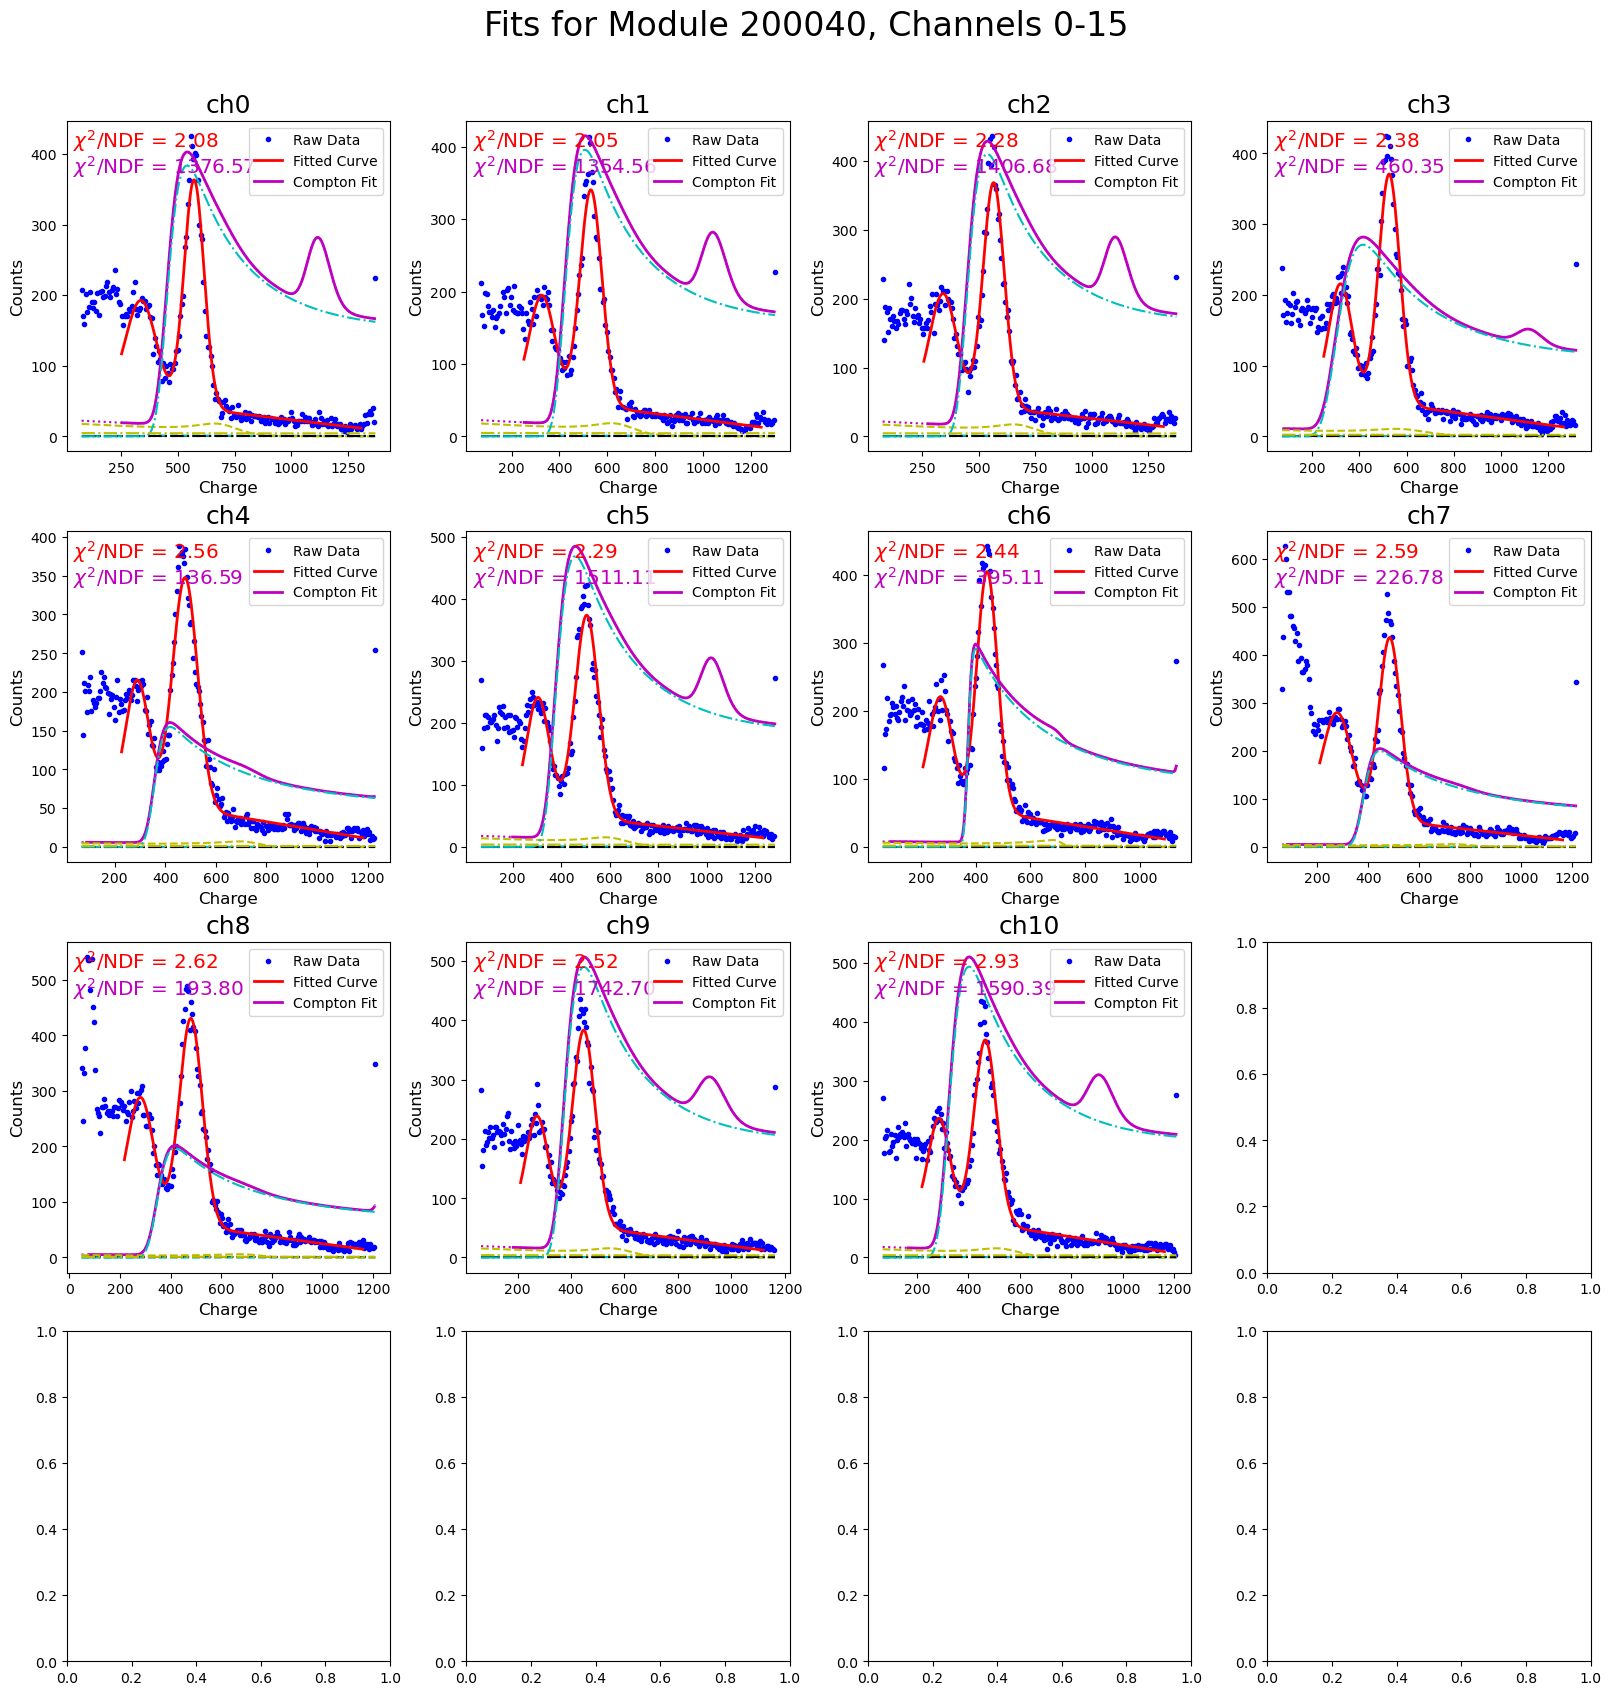

In [8]:
#file_path = "module_200040_Vov2.00_Nspe100000_Nsodium200000.root"
# file_path = "module_100025_Vov2.00_Nspe100000_Nsodium200000.root"
file_path = "module_100090_Vov3.00_Nspe10000_Nsodium100000.root"
file_paths = ["module_200040_Vov2.00_Nspe100000_Nsodium200000.root",
"module_100025_Vov2.00_Nspe100000_Nsodium200000.root",
"module_100090_Vov3.00_Nspe10000_Nsodium100000.root"]
row_num = 4; col_num = 4
#fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
#plt.figure(figsize=(30, 30))

centers = []
chi2s = []

for file_path in file_paths:
    mid = file_path.split("_")[1]
    
    fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
    for ch in (0, 16):
        print(r"\begin{tabular}{c|cc|ccccccccc}")
        print(r"Channel & Bi-modal $\chi^2$/NDF & Compton $\chi^2$/NDF & Offset & Response & Source Charge & A Source & A Backscatter & A Recoil & A Source2 & A Backscatter2 & A Recoil2 \\ \hline")

        plt.suptitle(f"Fits for Module {mid}, Channels {ch}-{ch+15}", fontsize=24, y=1.05)
        for row in range(row_num):
            for col in range(col_num):
                x_original, y_original, x, y, x_fit, y_fit, param_tuple, chi2 = fit_modified(file_path, ch, "sodium")
                # print("finished modified")
                cx_original, cy_original, cx, cy, cx_fit, cy_fit, cparam_tuple, cchi2 = fit_compton(file_path, ch, "sodium")
                # print("finished compton")
                # print(cparam_tuple)
                ax[row, col].plot(x_original, y_original, "b.", label="Raw Data")
                # ax[row, col].plot(x, y, "g--", label="Smoothed Data")
                ax[row, col].plot(x_fit, y_fit, "r-", lw=2, label="Fitted Curve")
                ax[row, col].plot(cx_fit, cy_fit, "m-", lw=2, label="Compton Fit")
                ax[row, col].set_xlabel("Charge", fontsize=12)
                ax[row, col].set_ylabel("Counts", fontsize=12)
                ax[row, col].legend(loc="upper right")
                ax[row, col].set_title(f"ch{ch}", fontsize=18) #  - ({chi2:.3f}, {cchi2:.3f})

                ax[row, col].text(0.02, 0.98, f"$\chi^2$/NDF = {chi2:>4.2f}", c="r", size="x-large", ha="left", va="top", transform=ax[row,col].transAxes)
                ax[row, col].text(0.02, 0.90, f"$\chi^2$/NDF = {cchi2:>4.2f}", c="m", size="x-large", ha="left", va="top", transform=ax[row,col].transAxes)

                # centers.append([param_tuple[1], cparam_tuple[1]])
                centers.append([max(param_tuple[1], param_tuple[4]), cparam_tuple[2]])
                chi2s.append([chi2, cchi2])
                # print(f"{ch:>2} : " + " ".join([f"{par:>8.3f}" for par in cparam_tuple]))
                print(f"{ch:>2} & {chi2:>6.3f} & {cchi2:>6.3f} & " + " & ".join([f"{par:>6.1f}" for par in cparam_tuple]) + r" \\")
                # o, s, m1, a1, ac1, ae1, ae2, c = 0, *cparam_tuple
                # o, s, m1, a1, ac1, ae1, ae2, c = cparam_tuple
                # o, s, m1, a1, ac1, ae1, ac2, ae2 = cparam_tuple
                o, s, m1, a1, ac1, ae1, a2, ac2, ae2 = cparam_tuple
                y_spectrum = full_spectrum(x_original, *cparam_tuple) #o, s, m1, a1, ac1, ae1, ac2, ae2)
                y_sg = full_spectrum(x_original, o, s, m1, a1, 0, 0, 0, 0, 0)
                y_sc = full_spectrum(x_original, o, s, m1, 0, ac1, 0, 0, 0, 0)
                y_se = full_spectrum(x_original, o, s, m1, 0, 0, ae1, 0, 0, 0)
                y_sg = full_spectrum(x_original, o, s, m1, 0, 0, 0, a2, 0, 0)
                y_sc2 = full_spectrum(x_original, o, s, m1, 0, 0, 0, 0, ac2, 0)
                y_se2 = full_spectrum(x_original, o, s, m1, 0, 0, 0, 0, 0, ae2)
                # ax[row, col].plot(x_original, y_original, "k")
                ax[row, col].plot(x_original, y_spectrum, "m:")
                ax[row, col].plot(x_original, y_sg, "k--")
                ax[row, col].plot(x_original, y_sc, "c--")
                ax[row, col].plot(x_original, y_se, "y--")
                ax[row, col].plot(x_original, y_sg, "k-.")
                ax[row, col].plot(x_original, y_sc2, "c-.")
                ax[row, col].plot(x_original, y_se2, "y-.")

                # print(f"ch{ch:<2} | Chi2 = {chi2:>5.3f} ")
                '''
                function_str = (
                f"$y = {a1:.2f} e^{{-\\left(\\frac{{x - {m1:.2f}}}{{{s1:.2f}}}\\right)^2}}"
                f" + {a2:.2f} e^{{-\\left(\\frac{{x - {m2:.2f}}}{{{s2:.2f}}}\\right)^2}}"
                f" + {m:.2f} x + {c:.2f}$"
                )
                '''
                ch+=1

        print(r"\end{tabular}")

        #plt.tight_layout()
        #plt.subplots_adjust(top=0.95)
        #fig.tight_layout(rect=[0, 0, 1, 0.98])
        plt.savefig(f"fits_module{mid}_ch{ch-16}-{ch-16}_052924.png", dpi=100, bbox_inches='tight')
plt.show()

centers = np.array(centers)
chi2s = np.array(chi2s)


In [ ]:
dc = centers[:,0] - centers[:,1]
# plt.hist(dc, bins=20, range=(-400, 400))
plt.hist(dc, bins=20, range=(dc.min(), dc.max()))
centers

In [ ]:
plt.plot(chi2s[:,0], ".")
plt.plot(chi2s[:,1], ".")


In [ ]:
plt.scatter(chi2s[:,0], chi2s[:,1])

In [ ]:
# file_path = "module_200040_Vov2.00_Nspe100000_Nsodium200000.root"
# #file_path = "module_100025_Vov2.00_Nspe100000_Nsodium200000.root"
# # file_path = "module_200060_Vov3.00_Nspe10000_Nsodium100000.root"
# row_num = 4; col_num = 4
# #fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# #plt.figure(figsize=(30, 30))
# ch = 16

# plt.suptitle("Fits for Module 200040, Channels 16-31", fontsize=24, y=1.05)
# for row in range(row_num):
#     for col in range(col_num):
#         x_original, y_original, x, y, x_fit, y_fit, param_tuple, chi2 = fit_modified(file_path, ch, "sodium")
        
#         ax[row, col].plot(x_original, y_original, "b.", label="Raw Data")
#         ax[row, col].plot(x, y, "g", label="Smoothed Data", linestyle="--")
#         ax[row, col].plot(x_fit, y_fit, "r-", label="Fitted Curve")
#         ax[row, col].set_xlabel("Charge", fontsize=12)
#         ax[row, col].set_ylabel("Counts", fontsize=12)
#         ax[row, col].legend()
#         ax[row, col].set_title(f"ch{ch} - {chi2}", fontsize=18)
#         '''
#         function_str = (
#             f"$y = {a1:.2f} e^{{-\\left(\\frac{{x - {m1:.2f}}}{{{s1:.2f}}}\\right)^2}}"
#             f" + {a2:.2f} e^{{-\\left(\\frac{{x - {m2:.2f}}}{{{s2:.2f}}}\\right)^2}}"
#             f" + {m:.2f} x + {c:.2f}$"
#         )
#         '''
#         ch+=1
# #
# #plt.tight_layout()
# #plt.subplots_adjust(top=0.95)
# #fig.tight_layout(rect=[0, 0, 1, 0.98])
# plt.savefig("fits_module200060_ch16-31_052924.png", dpi=100, bbox_inches='tight')
# plt.show()



In [ ]:
# file_path = "module_200040_Vov2.00_Nspe100000_Nsodium200000.root"
# #file_path = "module_100025_Vov2.00_Nspe100000_Nsodium200000.root"
# row_num = 4; col_num = 4
# #fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# #plt.figure(figsize=(30, 30))
# ch = 16

# plt.suptitle("Fits for Module 200040, Channels 16-31", fontsize=24, y=1.05)
# for row in range(row_num):
#     for col in range(col_num):
#         x_original, y_original, x, y, x_fit, y_fit, param_tuple, chi2 = fit_modified(file_path, ch, "sodium")
        
#         ax[row, col].plot(x_original, y_original, "b.", label="Raw Data")
#         ax[row, col].plot(x, y, "g", label="Smoothed Data", linestyle="--")
#         ax[row, col].plot(x_fit, y_fit, "r-", label="Fitted Curve")
#         ax[row, col].set_xlabel("Charge", fontsize=12)
#         ax[row, col].set_ylabel("Counts", fontsize=12)
#         ax[row, col].legend()
#         ax[row, col].set_title(f"ch{ch} - {chi2}", fontsize=18)
#         '''
#         function_str = (
#             f"$y = {a1:.2f} e^{{-\\left(\\frac{{x - {m1:.2f}}}{{{s1:.2f}}}\\right)^2}}"
#             f" + {a2:.2f} e^{{-\\left(\\frac{{x - {m2:.2f}}}{{{s2:.2f}}}\\right)^2}}"
#             f" + {m:.2f} x + {c:.2f}$"
#         )
#         '''
#         ch+=1
# #
# #plt.tight_layout()
# #plt.subplots_adjust(top=0.95)
# #fig.tight_layout(rect=[0, 0, 1, 0.98])
# plt.savefig("fits_051424_module200040_ch16-31_052124_2_adjustLinear.png", dpi=100, bbox_inches='tight')
# plt.show()



In [ ]:
# #file_path = "module_200040_Vov2.00_Nspe100000_Nsodium200000.root"
# file_path = "module_100025_Vov2.00_Nspe100000_Nsodium200000.root"
# row_num = 4; col_num = 4
# #fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# #plt.figure(figsize=(30, 30))
# ch = 0

# plt.suptitle("Fits for Module 100025, Channels 0-15", fontsize=24, y=1.05)
# for row in range(row_num):
#     for col in range(col_num):
#         x_original, y_original, x, y, x_fit, y_fit, param_tuple, chi2 = fit_modified(file_path, ch, "sodium")
        
#         ax[row, col].plot(x_original, y_original, "b.", label="Raw Data")
#         ax[row, col].plot(x, y, "g", label="Smoothed Data", linestyle="--")
#         ax[row, col].plot(x_fit, y_fit, "r-", label="Fitted Curve")
#         ax[row, col].set_xlabel("Charge", fontsize=12)
#         ax[row, col].set_ylabel("Counts", fontsize=12)
#         ax[row, col].legend()
#         ax[row, col].set_title(f"ch{ch} - {chi2}", fontsize=18)
#         '''
#         function_str = (
#             f"$y = {a1:.2f} e^{{-\\left(\\frac{{x - {m1:.2f}}}{{{s1:.2f}}}\\right)^2}}"
#             f" + {a2:.2f} e^{{-\\left(\\frac{{x - {m2:.2f}}}{{{s2:.2f}}}\\right)^2}}"
#             f" + {m:.2f} x + {c:.2f}$"
#         )
#         '''
#         ch+=1
# #
# #plt.tight_layout()
# #plt.subplots_adjust(top=0.95)
# #fig.tight_layout(rect=[0, 0, 1, 0.98])
# plt.savefig("fits_051424_module100025_ch0-15_052124_2.png", dpi=100, bbox_inches='tight')
# plt.show()



In [ ]:
# #file_path = "module_200040_Vov2.00_Nspe100000_Nsodium200000.root"
# file_path = "module_100090_Vov3.00_Nspe10000_Ncesium100000.root"
# row_num = 4; col_num = 4
# #fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# #plt.figure(figsize=(30, 30))
# ch = 0

# plt.suptitle("Cesium Fits for Module 100090, Channels 0-15", fontsize=24, y=1.05)
# for row in range(row_num):
#     for col in range(col_num):
#         x_original, y_original, x, y, x_fit, y_fit, param_tuple, chi2 = fit_modified(file_path, ch, "cesium")
        
#         ax[row, col].plot(x_original, y_original, "b.", label="Raw Data")
#         ax[row, col].plot(x, y, "g", label="Smoothed Data", linestyle="--")
#         ax[row, col].plot(x_fit, y_fit, "r-", label="Fitted Curve")
#         ax[row, col].set_xlabel("Charge", fontsize=12)
#         ax[row, col].set_ylabel("Counts", fontsize=12)
#         ax[row, col].legend()
#         ax[row, col].set_title(f"ch{ch} - {chi2}", fontsize=18)
#         '''
#         function_str = (
#             f"$y = {a1:.2f} e^{{-\\left(\\frac{{x - {m1:.2f}}}{{{s1:.2f}}}\\right)^2}}"
#             f" + {a2:.2f} e^{{-\\left(\\frac{{x - {m2:.2f}}}{{{s2:.2f}}}\\right)^2}}"
#             f" + {m:.2f} x + {c:.2f}$"
#         )
#         '''
#         ch+=1
# #
# #plt.tight_layout()
# #plt.subplots_adjust(top=0.95)
# #fig.tight_layout(rect=[0, 0, 1, 0.98])
# plt.savefig("fits_module100090_cesium_ch0-15_052924.png", dpi=100, bbox_inches='tight')
# plt.show()



In [ ]:
# #file_path = "module_200040_Vov2.00_Nspe100000_Nsodium200000.root"
# file_path = "module_200060_Vov3.00_Nspe10000_Ncesium100000.root"
# row_num = 4; col_num = 4
# #fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# #plt.figure(figsize=(30, 30))
# ch = 0

# plt.suptitle("Cesium fits for Module 200060, Channels 0-15", fontsize=24, y=1.05)
# for row in range(row_num):
#     for col in range(col_num):
#         x_original, y_original, x, y, x_fit, y_fit, param_tuple, chi2 = fit_modified(file_path, ch, "cesium")
        
#         ax[row, col].plot(x_original, y_original, "b.", label="Raw Data")
#         ax[row, col].plot(x, y, "g", label="Smoothed Data", linestyle="--")
#         ax[row, col].plot(x_fit, y_fit, "r-", label="Fitted Curve")
#         ax[row, col].set_xlabel("Charge", fontsize=12)
#         ax[row, col].set_ylabel("Counts", fontsize=12)
#         ax[row, col].legend()
#         ax[row, col].set_title(f"ch{ch} - {chi2}", fontsize=18)
#         '''
#         function_str = (
#             f"$y = {a1:.2f} e^{{-\\left(\\frac{{x - {m1:.2f}}}{{{s1:.2f}}}\\right)^2}}"
#             f" + {a2:.2f} e^{{-\\left(\\frac{{x - {m2:.2f}}}{{{s2:.2f}}}\\right)^2}}"
#             f" + {m:.2f} x + {c:.2f}$"
#         )
#         '''
#         ch+=1
# #
# #plt.tight_layout()
# #plt.subplots_adjust(top=0.95)
# #fig.tight_layout(rect=[0, 0, 1, 0.98])
# plt.savefig("fits_module200060_cesium_ch0-15_052924.png", dpi=100, bbox_inches='tight')
# plt.show()

